### Synthetic Image Classifier (API demo)

This notebook demonstrates the end-to-end `src.api.run_pipeline(...)` workflow on a built-in synthetic image dataset (`synthetic_shapes_2class`) using the `minicnn` model.

**What you get**
- Model training + evaluation
- Topology/graph-based scoring (configured via YAML in `config/`)
- Standard metrics (AUROC / AUPRC / FPR@95TPR)

Tip: change `cfg = load_config(...)`, `dataset_name=...`, and `model_name=...` below to run other combinations.


In [1]:
import numpy as np
import sys
from pathlib import Path

# Make `import src.*` work when running from nested directory
REPO_ROOT = Path.cwd().resolve()
if not (REPO_ROOT / "src").exists() and (REPO_ROOT.parent / "src").exists():
    REPO_ROOT = REPO_ROOT.parent.resolve()

if str(REPO_ROOT) not in sys.path:
    sys.path.insert(0, str(REPO_ROOT))
    
from src import (
    ExperimentConfig,
    load_config,
    list_datasets,
    list_models,
    run_pipeline,
)

# Load a base YAML config from ./config/ (convenience wrapper)
cfg = load_config("pgd_eps0p05_pca5")

print("datasets:", list_datasets())
print("models:", list_models())

datasets: ['breast_cancer_tabular', 'cifar10', 'cifar100', 'fashion_mnist', 'mnist', 'synthetic_shapes_2class', 'synthetic_shapes_3class', 'two_moons']
models: ['minicnn', 'two_moons_mlp']


### Explore available datasets / models

The project exposes registries of datasets and models.

- `list_datasets()` returns valid `dataset_name` strings for `run_pipeline(...)`.
- `list_models()` returns valid `model_name` strings for `run_pipeline(...)`.

If you add a new dataset or model, it typically needs to be implemented and registered in the corresponding `src/` modules (e.g. data/model + registry).


In [2]:
print(list_models()) # Ask Sven on how to include add new models

['minicnn', 'two_moons_mlp']


In [3]:
print(list_datasets()) # Ask Sven on how to include add new datasets

['breast_cancer_tabular', 'cifar10', 'cifar100', 'fashion_mnist', 'mnist', 'synthetic_shapes_2class', 'synthetic_shapes_3class', 'two_moons']


### Run an end-to-end experiment

`run_pipeline(...)` trains the chosen model, computes the configured topology/graph features and scores, and returns an object containing evaluation metrics under `result.eval.metrics`.

Use `max_points_for_scoring` to cap scoring runtime on larger datasets.


Epoch [10/10] Train Loss: 0.0009, Train Acc: 100.00%, Val Loss: 0.0008, Val Acc: 100.00%
AUROC: 0.81735
AUPRC: 0.8708576549764571
FPR@95TPR: 0.88


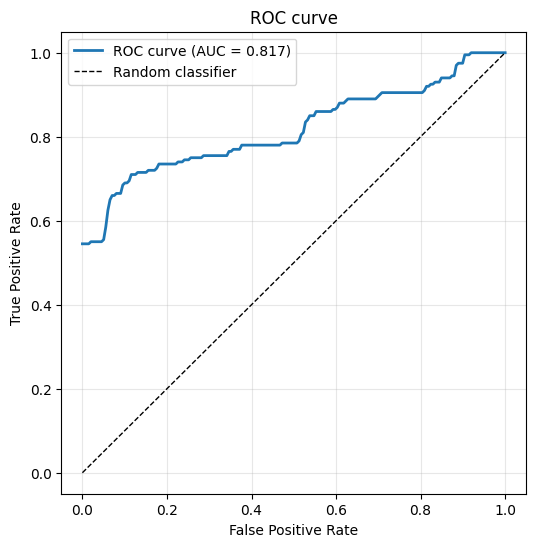

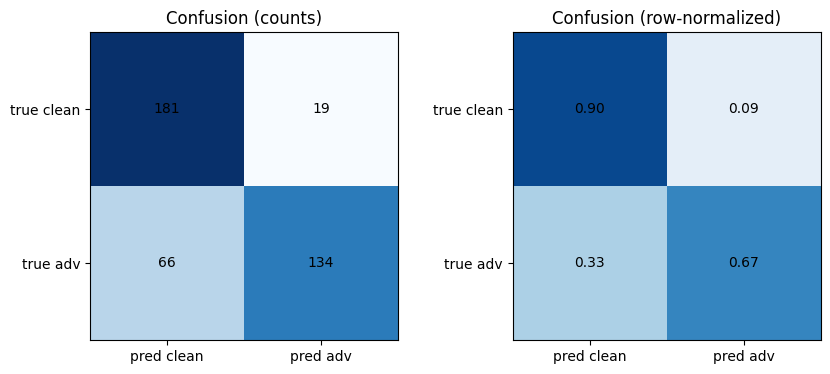

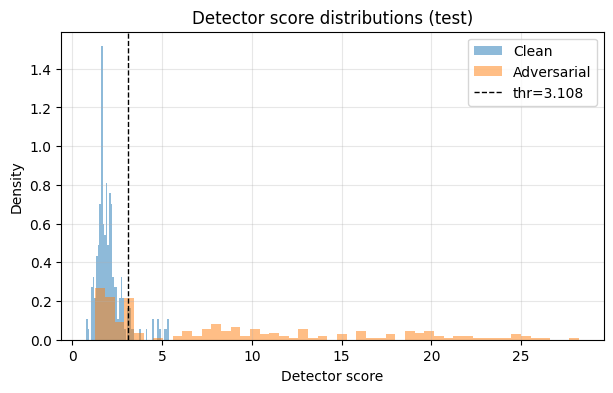

In [4]:
# End-to-end run on a synthetic image dataset
result = run_pipeline(
    dataset_name="synthetic_shapes_2class",
    model_name="minicnn",
    cfg=cfg,
    max_points_for_scoring=400,  # optional: keeps scoring runtime manageable
    seed=cfg.seed,
)

print("AUROC:", result.eval.metrics["roc_auc"])
print("AUPRC:", result.eval.metrics["pr_auc"])
print("FPR@95TPR:", result.eval.metrics["fpr_at_tpr95"])

### Interpreting the metrics

- **AUROC / AUPRC**: higher is better (better separation between in-distribution vs detected anomalies/attacks, depending on config).
- **FPR@95TPR**: false-positive rate when the true-positive rate is fixed at 95%; lower is better.

If you’re iterating quickly, start with a smaller `max_points_for_scoring` and fewer training epochs in the YAML config.
